In [1]:
import odl
import odl.discr as discr
import odl.contrib.torch as odl_torch
import numpy as np
import matplotlib.image as im
import matplotlib.pyplot as plt
import torch.nn as nn

In [3]:
# Working install for 1.0.0.dev0
! pip install https://github.com/odlgroup/odl/archive/master.zip
! python -m pip install numpy==1.23.5
! python -m pip install scipy==1.8.1

'1.0.0.dev0'

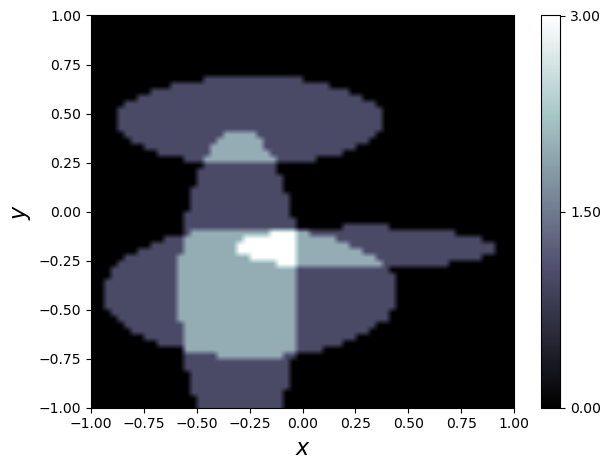

<Figure size 640x480 with 0 Axes>

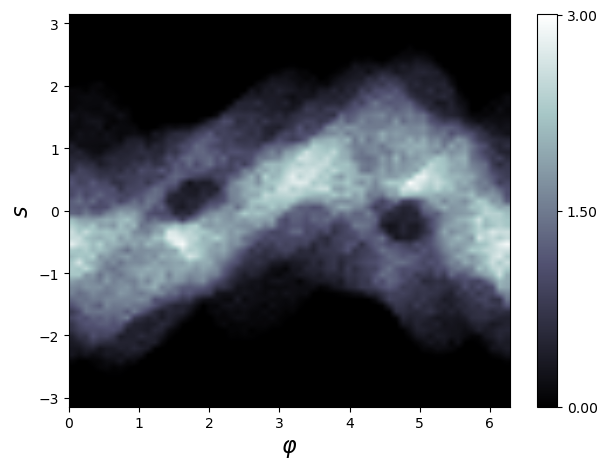

<Figure size 640x480 with 0 Axes>

torch.Size([64, 64])


In [175]:
import torch
def create_operator_and_space(primal_shape, dual_shape):
    X = odl.uniform_discr([-1, -1], [1, 1], primal_shape, dtype='float32')
    
    ang_interval = odl.set.domain.IntervalProd(0, 2*np.pi)
    ang_interval_pts = odl.discr.grid.RectGrid(np.linspace(0, 2*np.pi, dual_shape[0]+1)[:-1])
    ang_partition = odl.discr.partition.RectPartition(ang_interval, ang_interval_pts)

    a = 1. * np.pi
    line_interval = odl.set.domain.IntervalProd(-a, a)
    line_interval_pts = odl.discr.grid.RectGrid(np.linspace(-a, a, dual_shape[1]))
    line_partition = odl.discr.partition.RectPartition(line_interval, line_interval_pts)

    geom = odl.tomo.geometry.conebeam.FanBeamGeometry(ang_partition, line_partition, src_radius=2, det_radius=2)
    K = odl.tomo.RayTransform(X, geom, impl='astra_cuda')
    Y = K.range
    dK = K.adjoint
    return X, Y, K, dK


def random_gf_pair(X, Y, K, noise_level=0.1):
    ellipsoids = [[1., np.random.rand(), np.random.rand(), 0.5*(np.random.rand()*2 - 1), 0.5*(np.random.rand()*2-1), 0.] for i in range(4)]
    f = odl.phantom.geometric.ellipsoid_phantom(X, ellipsoids)
    #g = K(f) + noise_level * odl.phantom.noise.white_noise(Y)
    g = odl.phantom.poisson_noise(K(f) / noise_level) * noise_level
    return f, g


primal_shape = (64, 64)
dual_shape = (64, 64)

X, Y, K, dK = create_operator_and_space(primal_shape, dual_shape)
f, g = random_gf_pair(X, Y, K, noise_level=0.01)

f.show()
g.show()

amount_of_data = 10
#g = torch.zeros((amount_of_data, ) + dual_shape)
#f = torch.zeros((amount_of_data, ) + primal_shape)

print(torch.as_tensor(g).shape)


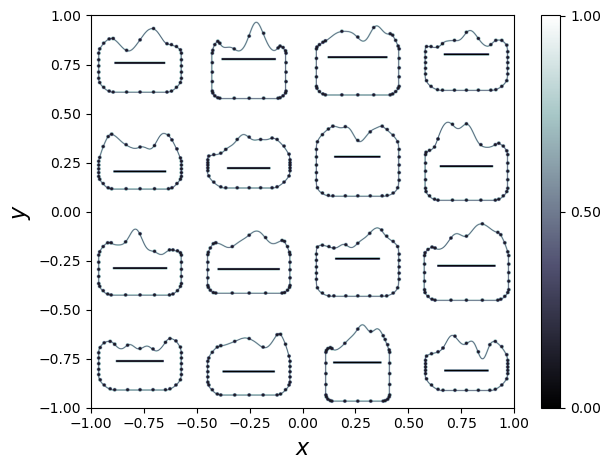

<Figure size 640x480 with 0 Axes>

<class 'odl.operator.operator.OperatorLeftScalarMult'>


In [5]:
img = im.imread("/home/emastr/phd/data/figures/domains.png")


x_np = np.array(img)[:, :, 0].astype('float32').T

X = odl.uniform_discr([-1, -1], [1, 1], x_np.shape, dtype='float32')
x = X.element(x_np)


# x.show()
Id = odl.IdentityOperator(X)
gradX = discr.Gradient(X)
gx = gradX(x)

gradX_adj = gradX.adjoint
x.show()

print(type(gradX_adj))
None

In [ ]:
conda install -c odlgroup odl
python -m pip install numpy==1.23.5
python -m pip install scipy==1.8.1